In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
url=f'https://imdb-api.com/en/API/Top250Movies/k_2807aivr'
req= requests.get(url)
data=req.json()
data1=data['items']   
D=pd.DataFrame.from_dict(data1,orient='columns')

    

In [3]:
D.dtypes

id                 object
rank               object
title              object
fullTitle          object
year               object
image              object
crew               object
imDbRating         object
imDbRatingCount    object
dtype: object

In [4]:
cnn=sqlite3.connect('movie.db')

In [ ]:
D.to_sql('top_movies',cnn)

In [6]:
cur=cnn.cursor()
rows=cur.execute("SELECT * FROM top_movies").fetchall()

In [7]:
movie=pd.DataFrame(rows)
movie.columns=['sr.No.','id','rank','title','fullTitle','year','image','crew','imDbRating','imDbRatingCount']
movie=movie.set_index('sr.No.')

In [8]:
movie

,id,rank,title,fullTitle,year,image,crew,imDbRating,imDbRatingCount
sr.No.,,,,,,,,,
0,tt0111161,1,The Shawshank Redemption,The Shawshank Redemption (1994),1994,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,2519164
1,tt0068646,2,The Godfather,The Godfather (1972),1972,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.1,1734694
2,tt0071562,3,The Godfather: Part II,The Godfather: Part II (1974),1974,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,1203735
3,tt0468569,4,The Dark Knight,The Dark Knight (2008),2008,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,2469478
4,tt0050083,5,12 Angry Men,12 Angry Men (1957),1957,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.9,743961
...,...,...,...,...,...,...,...,...,...
245,tt0058946,246,The Battle of Algiers,The Battle of Algiers (1966),1966,https://m.media-amazon.com/images/M/MV5BZWEzMG...,"Gillo Pontecorvo (dir.), Brahim Hadjadj, Jean ...",8.0,57800
246,tt0050783,247,Nights of Cabiria,Nights of Cabiria (1957),1957,https://m.media-amazon.com/images/M/MV5BOTdhNm...,"Federico Fellini (dir.), Giulietta Masina, Fra...",8.0,47100
247,tt0093779,248,The Princess Bride,The Princess Bride (1987),1987,https://m.media-amazon.com/images/M/MV5BMGM4M2...,"Rob Reiner (dir.), Cary Elwes, Mandy Patinkin",8.0,414984


In [9]:
movie.head()

,id,rank,title,fullTitle,year,image,crew,imDbRating,imDbRatingCount
sr.No.,,,,,,,,,
0,tt0111161,1,The Shawshank Redemption,The Shawshank Redemption (1994),1994,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,2519164
1,tt0068646,2,The Godfather,The Godfather (1972),1972,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.1,1734694
2,tt0071562,3,The Godfather: Part II,The Godfather: Part II (1974),1974,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,1203735
3,tt0468569,4,The Dark Knight,The Dark Knight (2008),2008,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,2469478
4,tt0050083,5,12 Angry Men,12 Angry Men (1957),1957,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.9,743961


In [10]:
print(movie.shape)
print(movie.size)

(250, 9)
2250


In [11]:
movie.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               250 non-null    object
 1   rank             250 non-null    object
 2   title            250 non-null    object
 3   fullTitle        250 non-null    object
 4   year             250 non-null    object
 5   image            250 non-null    object
 6   crew             250 non-null    object
 7   imDbRating       250 non-null    object
 8   imDbRatingCount  250 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB


In [14]:
# To count occurrence of all individual years in DAte columnmovie.value_counts()
M=movie.groupby('year').year.count()
M

year
1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2017    3
2018    5
2019    6
2020    2
2021    4
Name: year, Length: 86, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

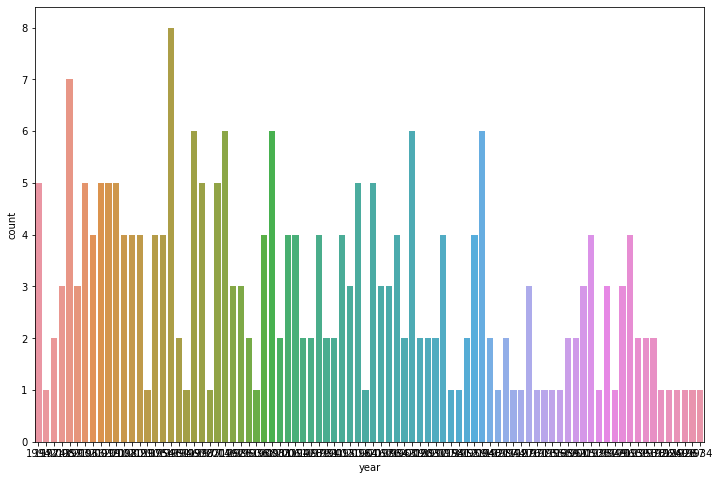

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(movie['year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

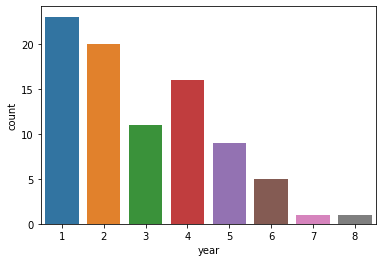

In [18]:
sns.countplot(M)

In [16]:
movie.groupby('imDbRating').imDbRating.count()

imDbRating
8.0    29
8.1    74
8.2    44
8.3    36
8.4    19
8.5    22
8.6    11
8.7     5
8.8     3
8.9     3
9.0     2
9.1     1
9.2     1
Name: imDbRating, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imDbRating', ylabel='count'>

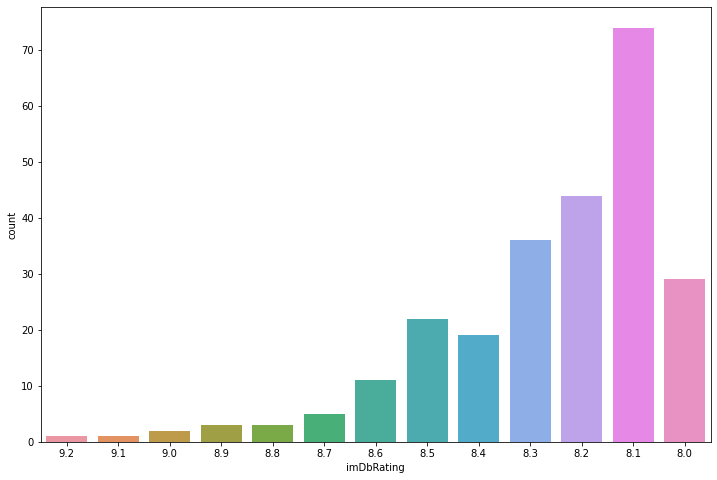

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(movie['imDbRating'])